In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics, cross_validation
from sklearn.linear_model import LogisticRegression as logreg
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from keras.utils import np_utils
np.random.seed(10)
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import keras

C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.
C:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
 

In [2]:
def recategorize(data,columnname):
    
    counts = data[columnname].value_counts()
    nameSet = set(counts[counts>= 0.01*len(data.index)].index.values)
    
    data.loc[:,columnname] = data[columnname].apply(lambda x:'OTHER'if x not in nameSet else x)
    return data

In [3]:

data = pd.read_csv("training.csv")

print(len(data.index)) # number of data (cars)

data.info()
#如果有一個missing 則去掉此物件
data2 = data.dropna(axis =0, how = 'any', subset = ['Color',
                                                    'Transmission',
                                                    'Nationality',
                                                    'Size',
                                                    'TopThreeAmericanName',
                                                    'MMRAcquisitionAuctionAveragePrice',
                                                    'MMRAcquisitionAuctionCleanPrice',
                                                    'MMRAcquisitionRetailAveragePrice',
                                                    'MMRAcquisitonRetailCleanPrice',
                                                    'MMRCurrentAuctionAveragePrice',
                                                    'MMRCurrentAuctionCleanPrice',
                                                    'MMRCurrentRetailAveragePrice',
                                                    'MMRCurrentRetailCleanPrice'])
data.head()

72983
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
RefId                                72983 non-null int64
IsBadBuy                             72983 non-null int64
PurchDate                            72983 non-null object
Auction                              72983 non-null object
VehYear                              72983 non-null int64
VehicleAge                           72983 non-null int64
Make                                 72983 non-null object
Model                                72983 non-null object
Trim                                 70623 non-null object
SubModel                             72975 non-null object
Color                                72975 non-null object
Transmission                         72974 non-null object
WheelTypeID                          69814 non-null float64
WheelType                            69809 non-null object
VehOdo                               72983 non-null int64
Nati

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [4]:
for i in range(len(data2.columns)):
    data2 = recategorize(data2, str(data2.columns[i]))

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [5]:
data2['Make'].unique()

array(['MAZDA', 'DODGE', 'FORD', 'MITSUBISHI', 'KIA', 'OTHER', 'NISSAN',
       'CHEVROLET', 'SATURN', 'CHRYSLER', 'MERCURY', 'HYUNDAI', 'TOYOTA',
       'PONTIAC', 'SUZUKI', 'JEEP'], dtype=object)

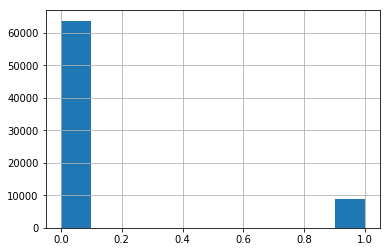

In [6]:
data2.IsBadBuy.hist()
plt.show()
#data2.Make.hist()
#data2.Make.value_counts().plot(kind='bar')
#plt.show()


In [7]:
data2_cleaned = data2.drop(["RefId","PurchDate","VehYear","WheelTypeID","BYRNO","VNZIP1","PRIMEUNIT","AUCGUART","Trim"],axis=1)

In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72658 entries, 0 to 72982
Data columns (total 34 columns):
RefId                                72658 non-null object
IsBadBuy                             72658 non-null int64
PurchDate                            72658 non-null object
Auction                              72658 non-null object
VehYear                              72658 non-null object
VehicleAge                           72658 non-null object
Make                                 72658 non-null object
Model                                72658 non-null object
Trim                                 72658 non-null object
SubModel                             72658 non-null object
Color                                72658 non-null object
Transmission                         72658 non-null object
WheelTypeID                          72658 non-null object
WheelType                            72658 non-null object
VehOdo                               72658 non-null object
Nationa

In [9]:
data2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72658 entries, 0 to 72982
Data columns (total 25 columns):
IsBadBuy                             72658 non-null int64
Auction                              72658 non-null object
VehicleAge                           72658 non-null object
Make                                 72658 non-null object
Model                                72658 non-null object
SubModel                             72658 non-null object
Color                                72658 non-null object
Transmission                         72658 non-null object
WheelType                            72658 non-null object
VehOdo                               72658 non-null object
Nationality                          72658 non-null object
Size                                 72658 non-null object
TopThreeAmericanName                 72658 non-null object
MMRAcquisitionAuctionAveragePrice    72658 non-null object
MMRAcquisitionAuctionCleanPrice      72658 non-null object
MMRAcqu

In [10]:
dataFinal = pd.get_dummies(data2_cleaned)
len(list(dataFinal))
dataFinal.head()
Y = dataFinal.loc[:,"IsBadBuy"]
X = dataFinal.drop("IsBadBuy",1)
#X.head()
dataFinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72658 entries, 0 to 72982
Columns: 166 entries, IsBadBuy to WarrantyCost_OTHER
dtypes: int64(2), uint8(164)
memory usage: 13.0 MB


In [11]:
from sklearn.preprocessing import StandardScaler as SC
sc = SC()
Xnew = sc.fit_transform(X)
X = np.array(X)
Y = np.array(Y)
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
X_train_ori, X_test_ori, Y_train_ori, Y_test_ori = train_test_split(X, Y)
X_train, X_test, Y_train, Y_test = train_test_split(Xnew, Y)


Y_train_ori_onehot = np_utils.to_categorical(Y_train_ori)
Y_test_ori_onehot = np_utils.to_categorical(Y_test_ori)
Y_train_onehot = np_utils.to_categorical(Y_train)
Y_test_onehot = np_utils.to_categorical(Y_test)



In [12]:
X_train_ori.shape

(54493, 165)

In [13]:
#acc = []

#for i in range(5,50):
model = Sequential()
    #輸入層：7, 隱藏層：50，輸出層：2
model.add(Dense(units=i, 
                input_dim=165,
                kernel_initializer='normal',
                activation='relu'))

model.add(Dense(units=370,
                kernel_initializer='normal',
                activation='relu'))
    
model.add(Dropout(0.3))


model.add(Dense(units=165,
                kernel_initializer='normal',
                activation='relu'))
    
model.add(Dropout(0.2))


model.add(Dense(units=45,
                kernel_initializer='normal',
                activation='relu'))
    
model.add(Dropout(0.6))



    
model.add(Dense(units=2,
                kernel_initializer='normal',
                activation='softmax'))
    #定義訓練方式
adam = keras.optimizers.Adam(lr=0.0001, beta_1=0.99, beta_2=0.999, amsgrad=False)
model.compile(loss='categorical_crossentropy',
              optimizer=adam, metrics=['accuracy'])
train_history =model.fit(x=X_train_ori,
                         y=Y_train_ori_onehot,
                         validation_split=0.3, 
                         epochs=20,
                         batch_size=93,
                         verbose=2)

    #評估準確率
scores = model.evaluate(X_test_ori, Y_test_ori_onehot)
print('\n準確率=',scores[1])
#acc.append(scores[1])

W0217 10:46:52.640278   336 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0217 10:46:52.726357   336 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0217 10:46:52.741976   336 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0217 10:46:52.851345   336 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0217 10:46:52.882593   336 deprecation.py:506] From

Train on 38145 samples, validate on 16348 samples
Epoch 1/20
 - 9s - loss: 0.4572 - acc: 0.8762 - val_loss: 0.3665 - val_acc: 0.8751
Epoch 2/20
 - 6s - loss: 0.3683 - acc: 0.8784 - val_loss: 0.3540 - val_acc: 0.8751
Epoch 3/20
 - 6s - loss: 0.3516 - acc: 0.8784 - val_loss: 0.3421 - val_acc: 0.8751
Epoch 4/20
 - 6s - loss: 0.3367 - acc: 0.8784 - val_loss: 0.3309 - val_acc: 0.8751
Epoch 5/20
 - 7s - loss: 0.3269 - acc: 0.8786 - val_loss: 0.3269 - val_acc: 0.8751
Epoch 6/20
 - 7s - loss: 0.3233 - acc: 0.8907 - val_loss: 0.3239 - val_acc: 0.8908
Epoch 7/20
 - 6s - loss: 0.3185 - acc: 0.8973 - val_loss: 0.3221 - val_acc: 0.8910
Epoch 8/20
 - 6s - loss: 0.3180 - acc: 0.8976 - val_loss: 0.3225 - val_acc: 0.8909
Epoch 9/20
 - 7s - loss: 0.3182 - acc: 0.8976 - val_loss: 0.3209 - val_acc: 0.8909
Epoch 10/20
 - 6s - loss: 0.3154 - acc: 0.8979 - val_loss: 0.3207 - val_acc: 0.8911
Epoch 11/20
 - 7s - loss: 0.3146 - acc: 0.8978 - val_loss: 0.3199 - val_acc: 0.8915
Epoch 12/20
 - 7s - loss: 0.3139 - 

In [14]:
X_train, X_test, Y_train, Y_test

(array([[-0.16136929, -0.49675924, -1.1342383 , ..., -0.18502274,
         -0.17158604, -0.758334  ],
        [-0.16136929, -0.49675924,  0.88164894, ..., -0.18502274,
         -0.17158604, -0.758334  ],
        [-0.16136929, -0.49675924,  0.88164894, ..., -0.18502274,
         -0.17158604, -0.758334  ],
        ...,
        [-0.16136929, -0.49675924, -1.1342383 , ..., -0.18502274,
         -0.17158604, -0.758334  ],
        [-0.16136929, -0.49675924,  0.88164894, ..., -0.18502274,
         -0.17158604,  1.31868016],
        [-0.16136929, -0.49675924,  0.88164894, ..., -0.18502274,
         -0.17158604, -0.758334  ]]),
 array([[-0.16136929, -0.49675924,  0.88164894, ..., -0.18502274,
          5.82798004, -0.758334  ],
        [-0.16136929, -0.49675924, -1.1342383 , ..., -0.18502274,
         -0.17158604, -0.758334  ],
        [-0.16136929, -0.49675924, -1.1342383 , ..., -0.18502274,
         -0.17158604,  1.31868016],
        ...,
        [-0.16136929, -0.49675924,  0.88164894, ..., -

In [15]:
#acc = []
i = 260
#for i in range(5,50):
model = Sequential()
    #輸入層：7, 隱藏層：50，輸出層：2
model.add(Dense(units=i, 
                input_dim=165,
                kernel_initializer='normal',
                activation='relu'))

model.add(Dense(units=370,
                kernel_initializer='normal',
                activation='relu'))
    
model.add(Dropout(0.3))


model.add(Dense(units=165,
                kernel_initializer='normal',
                activation='relu'))
    
model.add(Dropout(0.2))


model.add(Dense(units=45,
                kernel_initializer='normal',
                activation='relu'))
    
model.add(Dropout(0.6))



    
model.add(Dense(units=2,
                kernel_initializer='normal',
                activation='softmax'))
    #定義訓練方式
model.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])
train_history =model.fit(x=X_train,
                         y=Y_train_onehot,
                         validation_split=0.3, 
                         epochs=1500,
                         batch_size=30,
                         verbose=2)

    #評估準確率
scores = model.evaluate(X_test, Y_test_onehot)
print('\n準確率=',scores[1])
#acc.append(scores[1])

W0217 10:49:15.133836   336 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Train on 38145 samples, validate on 16348 samples
Epoch 1/1500
 - 24s - loss: 0.3502 - acc: 0.8869 - val_loss: 0.3165 - val_acc: 0.8963
Epoch 2/1500
 - 20s - loss: 0.3244 - acc: 0.8946 - val_loss: 0.3203 - val_acc: 0.8994
Epoch 3/1500
 - 21s - loss: 0.3136 - acc: 0.8963 - val_loss: 0.3076 - val_acc: 0.8999
Epoch 4/1500
 - 20s - loss: 0.3079 - acc: 0.8979 - val_loss: 0.3102 - val_acc: 0.9008
Epoch 5/1500
 - 20s - loss: 0.3033 - acc: 0.8982 - val_loss: 0.3117 - val_acc: 0.9006
Epoch 6/1500
 - 21s - loss: 0.2973 - acc: 0.8998 - val_loss: 0.3137 - val_acc: 0.9003
Epoch 7/1500
 - 20s - loss: 0.2913 - acc: 0.9003 - val_loss: 0.3225 - val_acc: 0.8990
Epoch 8/1500
 - 20s - loss: 0.2845 - acc: 0.9015 - val_loss: 0.3273 - val_acc: 0.8996
Epoch 9/1500
 - 21s - loss: 0.2780 - acc: 0.9038 - val_loss: 0.3344 - val_acc: 0.8985
Epoch 10/1500
 - 20s - loss: 0.2721 - acc: 0.9045 - val_loss: 0.3314 - val_acc: 0.8964
Epoch 11/1500
 - 21s - loss: 0.2628 - acc: 0.9066 - val_loss: 0.3635 - val_acc: 0.8972
Ep

Epoch 95/1500
 - 20s - loss: 0.0598 - acc: 0.9755 - val_loss: 1.1462 - val_acc: 0.8755
Epoch 96/1500
 - 20s - loss: 0.0643 - acc: 0.9743 - val_loss: 1.2291 - val_acc: 0.8797
Epoch 97/1500
 - 20s - loss: 0.0631 - acc: 0.9740 - val_loss: 1.2990 - val_acc: 0.8698
Epoch 98/1500
 - 21s - loss: 0.0591 - acc: 0.9758 - val_loss: 1.2830 - val_acc: 0.8769
Epoch 99/1500
 - 20s - loss: 0.0649 - acc: 0.9747 - val_loss: 1.1687 - val_acc: 0.8752
Epoch 100/1500
 - 20s - loss: 0.0640 - acc: 0.9740 - val_loss: 1.1925 - val_acc: 0.8802
Epoch 101/1500
 - 20s - loss: 0.0603 - acc: 0.9758 - val_loss: 1.2765 - val_acc: 0.8718
Epoch 102/1500
 - 21s - loss: 0.0636 - acc: 0.9745 - val_loss: 1.1715 - val_acc: 0.8801
Epoch 103/1500
 - 20s - loss: 0.0623 - acc: 0.9750 - val_loss: 1.2698 - val_acc: 0.8728
Epoch 104/1500
 - 21s - loss: 0.0639 - acc: 0.9755 - val_loss: 1.2099 - val_acc: 0.8770
Epoch 105/1500
 - 20s - loss: 0.0644 - acc: 0.9750 - val_loss: 1.1501 - val_acc: 0.8774
Epoch 106/1500
 - 20s - loss: 0.0659 

 - 20s - loss: 0.0519 - acc: 0.9793 - val_loss: 1.4294 - val_acc: 0.8787
Epoch 189/1500
 - 20s - loss: 0.0541 - acc: 0.9785 - val_loss: 1.3619 - val_acc: 0.8739
Epoch 190/1500
 - 20s - loss: 0.0564 - acc: 0.9775 - val_loss: 1.4126 - val_acc: 0.8790
Epoch 191/1500
 - 20s - loss: 0.0508 - acc: 0.9790 - val_loss: 1.4070 - val_acc: 0.8765
Epoch 192/1500
 - 20s - loss: 0.0518 - acc: 0.9787 - val_loss: 1.3504 - val_acc: 0.8791
Epoch 193/1500
 - 20s - loss: 0.0570 - acc: 0.9775 - val_loss: 1.4468 - val_acc: 0.8763
Epoch 194/1500
 - 20s - loss: 0.0570 - acc: 0.9786 - val_loss: 1.4077 - val_acc: 0.8762
Epoch 195/1500
 - 20s - loss: 0.0517 - acc: 0.9791 - val_loss: 1.4026 - val_acc: 0.8822
Epoch 196/1500
 - 20s - loss: 0.0560 - acc: 0.9780 - val_loss: 1.4266 - val_acc: 0.8760
Epoch 197/1500
 - 21s - loss: 0.0502 - acc: 0.9805 - val_loss: 1.5385 - val_acc: 0.8705
Epoch 198/1500
 - 20s - loss: 0.0471 - acc: 0.9798 - val_loss: 1.4351 - val_acc: 0.8760
Epoch 199/1500
 - 20s - loss: 0.0544 - acc: 0.9

Epoch 282/1500
 - 21s - loss: 0.0492 - acc: 0.9799 - val_loss: 1.5514 - val_acc: 0.8743
Epoch 283/1500
 - 21s - loss: 0.0495 - acc: 0.9801 - val_loss: 1.5574 - val_acc: 0.8704
Epoch 284/1500
 - 21s - loss: 0.0583 - acc: 0.9791 - val_loss: 1.4419 - val_acc: 0.8731
Epoch 285/1500
 - 20s - loss: 0.0560 - acc: 0.9793 - val_loss: 1.4499 - val_acc: 0.8724
Epoch 286/1500
 - 21s - loss: 0.0482 - acc: 0.9799 - val_loss: 1.4838 - val_acc: 0.8725
Epoch 287/1500
 - 21s - loss: 0.0495 - acc: 0.9803 - val_loss: 1.4482 - val_acc: 0.8752
Epoch 288/1500
 - 21s - loss: 0.0497 - acc: 0.9802 - val_loss: 1.4056 - val_acc: 0.8799
Epoch 289/1500
 - 21s - loss: 0.0548 - acc: 0.9794 - val_loss: 1.4631 - val_acc: 0.8778
Epoch 290/1500
 - 21s - loss: 0.0460 - acc: 0.9800 - val_loss: 1.4248 - val_acc: 0.8803
Epoch 291/1500
 - 21s - loss: 0.0495 - acc: 0.9813 - val_loss: 1.5177 - val_acc: 0.8759
Epoch 292/1500
 - 20s - loss: 0.0529 - acc: 0.9800 - val_loss: 1.4786 - val_acc: 0.8771
Epoch 293/1500
 - 20s - loss: 0.

 - 20s - loss: 0.0481 - acc: 0.9796 - val_loss: 1.5707 - val_acc: 0.8755
Epoch 376/1500
 - 21s - loss: 0.0535 - acc: 0.9800 - val_loss: 1.4755 - val_acc: 0.8713
Epoch 377/1500
 - 20s - loss: 0.0484 - acc: 0.9799 - val_loss: 1.5409 - val_acc: 0.8774
Epoch 378/1500
 - 20s - loss: 0.0505 - acc: 0.9802 - val_loss: 1.5174 - val_acc: 0.8811
Epoch 379/1500
 - 20s - loss: 0.0535 - acc: 0.9794 - val_loss: 1.4981 - val_acc: 0.8744
Epoch 380/1500
 - 21s - loss: 0.0492 - acc: 0.9804 - val_loss: 1.5043 - val_acc: 0.8769
Epoch 381/1500
 - 21s - loss: 0.0561 - acc: 0.9788 - val_loss: 1.5004 - val_acc: 0.8786
Epoch 382/1500
 - 21s - loss: 0.0497 - acc: 0.9809 - val_loss: 1.5642 - val_acc: 0.8733
Epoch 383/1500
 - 21s - loss: 0.0562 - acc: 0.9798 - val_loss: 1.5153 - val_acc: 0.8780
Epoch 384/1500
 - 21s - loss: 0.0524 - acc: 0.9803 - val_loss: 1.5092 - val_acc: 0.8806
Epoch 385/1500
 - 21s - loss: 0.0621 - acc: 0.9765 - val_loss: 1.4690 - val_acc: 0.8776
Epoch 386/1500
 - 21s - loss: 0.0579 - acc: 0.9

Epoch 469/1500
 - 20s - loss: 0.0533 - acc: 0.9805 - val_loss: 1.5123 - val_acc: 0.8767
Epoch 470/1500
 - 20s - loss: 0.0583 - acc: 0.9787 - val_loss: 1.4815 - val_acc: 0.8700
Epoch 471/1500
 - 20s - loss: 0.0588 - acc: 0.9792 - val_loss: 1.5588 - val_acc: 0.8715
Epoch 472/1500
 - 20s - loss: 0.0529 - acc: 0.9810 - val_loss: 1.4500 - val_acc: 0.8754
Epoch 473/1500
 - 20s - loss: 0.0510 - acc: 0.9809 - val_loss: 1.5507 - val_acc: 0.8753
Epoch 474/1500
 - 20s - loss: 0.0485 - acc: 0.9814 - val_loss: 1.6068 - val_acc: 0.8714
Epoch 475/1500
 - 21s - loss: 0.0495 - acc: 0.9802 - val_loss: 1.4672 - val_acc: 0.8791
Epoch 476/1500
 - 24s - loss: 0.0509 - acc: 0.9806 - val_loss: 1.5233 - val_acc: 0.8799
Epoch 477/1500
 - 24s - loss: 0.0501 - acc: 0.9807 - val_loss: 1.5058 - val_acc: 0.8743
Epoch 478/1500
 - 23s - loss: 0.0487 - acc: 0.9802 - val_loss: 1.4623 - val_acc: 0.8811
Epoch 479/1500
 - 23s - loss: 0.0473 - acc: 0.9811 - val_loss: 1.5516 - val_acc: 0.8793
Epoch 480/1500
 - 22s - loss: 0.

 - 20s - loss: 0.0561 - acc: 0.9792 - val_loss: 1.5628 - val_acc: 0.8763
Epoch 563/1500
 - 20s - loss: 0.0602 - acc: 0.9785 - val_loss: 1.4365 - val_acc: 0.8786
Epoch 564/1500
 - 21s - loss: 0.0537 - acc: 0.9805 - val_loss: 1.4581 - val_acc: 0.8770
Epoch 565/1500
 - 20s - loss: 0.0630 - acc: 0.9783 - val_loss: 1.4644 - val_acc: 0.8775
Epoch 566/1500
 - 20s - loss: 0.0615 - acc: 0.9785 - val_loss: 1.4692 - val_acc: 0.8777
Epoch 567/1500
 - 20s - loss: 0.0566 - acc: 0.9793 - val_loss: 1.5963 - val_acc: 0.8772
Epoch 568/1500
 - 21s - loss: 0.0510 - acc: 0.9812 - val_loss: 1.5145 - val_acc: 0.8774
Epoch 569/1500
 - 20s - loss: 0.0507 - acc: 0.9806 - val_loss: 1.5331 - val_acc: 0.8762
Epoch 570/1500
 - 20s - loss: 0.0559 - acc: 0.9789 - val_loss: 1.5217 - val_acc: 0.8730
Epoch 571/1500
 - 20s - loss: 0.0518 - acc: 0.9800 - val_loss: 1.4677 - val_acc: 0.8753
Epoch 572/1500
 - 20s - loss: 0.0608 - acc: 0.9790 - val_loss: 1.4401 - val_acc: 0.8783
Epoch 573/1500
 - 20s - loss: 0.0608 - acc: 0.9

Epoch 656/1500
 - 8s - loss: 0.0571 - acc: 0.9792 - val_loss: 1.6039 - val_acc: 0.8759
Epoch 657/1500
 - 8s - loss: 0.0586 - acc: 0.9784 - val_loss: 1.6861 - val_acc: 0.8733
Epoch 658/1500
 - 8s - loss: 0.0691 - acc: 0.9772 - val_loss: 1.4500 - val_acc: 0.8822
Epoch 659/1500
 - 8s - loss: 0.0693 - acc: 0.9773 - val_loss: 1.5299 - val_acc: 0.8760
Epoch 660/1500
 - 8s - loss: 0.0665 - acc: 0.9775 - val_loss: 1.5585 - val_acc: 0.8746
Epoch 661/1500
 - 8s - loss: 0.0656 - acc: 0.9772 - val_loss: 1.5071 - val_acc: 0.8791
Epoch 662/1500
 - 8s - loss: 0.0576 - acc: 0.9787 - val_loss: 1.5098 - val_acc: 0.8770
Epoch 663/1500
 - 8s - loss: 0.0568 - acc: 0.9796 - val_loss: 1.6013 - val_acc: 0.8728
Epoch 664/1500
 - 8s - loss: 0.0605 - acc: 0.9797 - val_loss: 1.5313 - val_acc: 0.8777
Epoch 665/1500
 - 8s - loss: 0.0568 - acc: 0.9791 - val_loss: 1.5511 - val_acc: 0.8765
Epoch 666/1500
 - 8s - loss: 0.0696 - acc: 0.9782 - val_loss: 1.5188 - val_acc: 0.8753
Epoch 667/1500
 - 8s - loss: 0.0657 - acc: 

 - 8s - loss: 0.0618 - acc: 0.9794 - val_loss: 1.5432 - val_acc: 0.8760
Epoch 751/1500
 - 8s - loss: 0.0648 - acc: 0.9786 - val_loss: 1.4583 - val_acc: 0.8793
Epoch 752/1500
 - 8s - loss: 0.0554 - acc: 0.9798 - val_loss: 1.5806 - val_acc: 0.8763
Epoch 753/1500
 - 8s - loss: 0.0665 - acc: 0.9780 - val_loss: 1.5001 - val_acc: 0.8758
Epoch 754/1500
 - 8s - loss: 0.0591 - acc: 0.9791 - val_loss: 1.5702 - val_acc: 0.8755
Epoch 755/1500
 - 8s - loss: 0.0662 - acc: 0.9762 - val_loss: 1.5235 - val_acc: 0.8750
Epoch 756/1500
 - 8s - loss: 0.0611 - acc: 0.9780 - val_loss: 1.4979 - val_acc: 0.8762
Epoch 757/1500
 - 8s - loss: 0.0630 - acc: 0.9773 - val_loss: 1.4477 - val_acc: 0.8794
Epoch 758/1500
 - 8s - loss: 0.0632 - acc: 0.9782 - val_loss: 1.4605 - val_acc: 0.8785
Epoch 759/1500
 - 8s - loss: 0.0571 - acc: 0.9785 - val_loss: 1.5413 - val_acc: 0.8747
Epoch 760/1500
 - 8s - loss: 0.0568 - acc: 0.9786 - val_loss: 1.4678 - val_acc: 0.8784
Epoch 761/1500
 - 8s - loss: 0.0568 - acc: 0.9762 - val_lo

Epoch 845/1500
 - 8s - loss: 0.0727 - acc: 0.9770 - val_loss: 1.4859 - val_acc: 0.8731
Epoch 846/1500
 - 8s - loss: 0.0750 - acc: 0.9760 - val_loss: 1.4512 - val_acc: 0.8730
Epoch 847/1500
 - 8s - loss: 0.0700 - acc: 0.9772 - val_loss: 1.4776 - val_acc: 0.8696
Epoch 848/1500
 - 8s - loss: 0.0786 - acc: 0.9748 - val_loss: 1.5713 - val_acc: 0.8698
Epoch 849/1500
 - 8s - loss: 0.0699 - acc: 0.9765 - val_loss: 1.4803 - val_acc: 0.8790
Epoch 850/1500
 - 8s - loss: 0.0655 - acc: 0.9773 - val_loss: 1.5784 - val_acc: 0.8745
Epoch 851/1500
 - 8s - loss: 0.0678 - acc: 0.9767 - val_loss: 1.6144 - val_acc: 0.8713
Epoch 852/1500
 - 8s - loss: 0.0758 - acc: 0.9752 - val_loss: 1.4838 - val_acc: 0.8757
Epoch 853/1500
 - 8s - loss: 0.0761 - acc: 0.9759 - val_loss: 1.4812 - val_acc: 0.8737
Epoch 854/1500
 - 8s - loss: 0.0792 - acc: 0.9752 - val_loss: 1.4970 - val_acc: 0.8717
Epoch 855/1500
 - 8s - loss: 0.0750 - acc: 0.9758 - val_loss: 1.4407 - val_acc: 0.8742
Epoch 856/1500
 - 8s - loss: 0.0639 - acc: 

 - 8s - loss: 0.0714 - acc: 0.9761 - val_loss: 1.5151 - val_acc: 0.8674
Epoch 940/1500
 - 8s - loss: 0.0710 - acc: 0.9767 - val_loss: 1.4637 - val_acc: 0.8696
Epoch 941/1500
 - 8s - loss: 0.0756 - acc: 0.9769 - val_loss: 1.5166 - val_acc: 0.8722
Epoch 942/1500
 - 8s - loss: 0.0751 - acc: 0.9771 - val_loss: 1.4867 - val_acc: 0.8770
Epoch 943/1500
 - 8s - loss: 0.0748 - acc: 0.9764 - val_loss: 1.5055 - val_acc: 0.8766
Epoch 944/1500
 - 8s - loss: 0.0834 - acc: 0.9751 - val_loss: 1.4987 - val_acc: 0.8785
Epoch 945/1500
 - 8s - loss: 0.0757 - acc: 0.9758 - val_loss: 1.5021 - val_acc: 0.8760
Epoch 946/1500
 - 8s - loss: 0.0762 - acc: 0.9752 - val_loss: 1.4652 - val_acc: 0.8736
Epoch 947/1500
 - 8s - loss: 0.0695 - acc: 0.9766 - val_loss: 1.5131 - val_acc: 0.8718
Epoch 948/1500
 - 8s - loss: 0.0703 - acc: 0.9778 - val_loss: 1.5268 - val_acc: 0.8758
Epoch 949/1500
 - 8s - loss: 0.0786 - acc: 0.9742 - val_loss: 1.3679 - val_acc: 0.8805
Epoch 950/1500
 - 8s - loss: 0.0752 - acc: 0.9736 - val_lo

Epoch 1033/1500
 - 8s - loss: 0.0742 - acc: 0.9752 - val_loss: 1.5487 - val_acc: 0.8801
Epoch 1034/1500
 - 8s - loss: 0.0739 - acc: 0.9758 - val_loss: 1.5078 - val_acc: 0.8800
Epoch 1035/1500
 - 8s - loss: 0.0877 - acc: 0.9743 - val_loss: 1.5130 - val_acc: 0.8759
Epoch 1036/1500
 - 8s - loss: 0.0736 - acc: 0.9743 - val_loss: 1.5376 - val_acc: 0.8801
Epoch 1037/1500
 - 8s - loss: 0.0663 - acc: 0.9751 - val_loss: 1.5237 - val_acc: 0.8776
Epoch 1038/1500
 - 8s - loss: 0.0759 - acc: 0.9742 - val_loss: 1.5254 - val_acc: 0.8777
Epoch 1039/1500
 - 8s - loss: 0.0850 - acc: 0.9718 - val_loss: 1.4638 - val_acc: 0.8812
Epoch 1040/1500
 - 8s - loss: 0.0818 - acc: 0.9725 - val_loss: 1.4448 - val_acc: 0.8633
Epoch 1041/1500
 - 8s - loss: 0.0701 - acc: 0.9760 - val_loss: 1.5042 - val_acc: 0.8671
Epoch 1042/1500
 - 8s - loss: 0.0649 - acc: 0.9766 - val_loss: 1.4540 - val_acc: 0.8734
Epoch 1043/1500
 - 9s - loss: 0.0805 - acc: 0.9750 - val_loss: 1.4403 - val_acc: 0.8761
Epoch 1044/1500
 - 10s - loss: 0

Epoch 1126/1500
 - 8s - loss: 0.0779 - acc: 0.9756 - val_loss: 1.5559 - val_acc: 0.8780
Epoch 1127/1500
 - 8s - loss: 0.0993 - acc: 0.9733 - val_loss: 1.4468 - val_acc: 0.8717
Epoch 1128/1500
 - 8s - loss: 0.0927 - acc: 0.9700 - val_loss: 1.4857 - val_acc: 0.8692
Epoch 1129/1500
 - 8s - loss: 0.1008 - acc: 0.9699 - val_loss: 1.5115 - val_acc: 0.8746
Epoch 1130/1500
 - 8s - loss: 0.1346 - acc: 0.9681 - val_loss: 1.4726 - val_acc: 0.8684
Epoch 1131/1500
 - 8s - loss: 0.0942 - acc: 0.9696 - val_loss: 1.4597 - val_acc: 0.8767
Epoch 1132/1500
 - 8s - loss: 0.0935 - acc: 0.9716 - val_loss: 1.4774 - val_acc: 0.8721
Epoch 1133/1500
 - 8s - loss: 0.0824 - acc: 0.9718 - val_loss: 1.5883 - val_acc: 0.8709
Epoch 1134/1500
 - 8s - loss: 0.1014 - acc: 0.9675 - val_loss: 1.4310 - val_acc: 0.8700
Epoch 1135/1500
 - 8s - loss: 0.0825 - acc: 0.9712 - val_loss: 1.4862 - val_acc: 0.8785
Epoch 1136/1500
 - 8s - loss: 0.0817 - acc: 0.9732 - val_loss: 1.5515 - val_acc: 0.8767
Epoch 1137/1500
 - 8s - loss: 0.

 - 8s - loss: 0.0857 - acc: 0.9713 - val_loss: 1.5486 - val_acc: 0.8774
Epoch 1220/1500
 - 8s - loss: 0.0933 - acc: 0.9719 - val_loss: 1.5166 - val_acc: 0.8682
Epoch 1221/1500
 - 8s - loss: 0.0893 - acc: 0.9695 - val_loss: 1.4663 - val_acc: 0.8715
Epoch 1222/1500
 - 8s - loss: 0.0813 - acc: 0.9705 - val_loss: 1.4808 - val_acc: 0.8795
Epoch 1223/1500
 - 8s - loss: 0.0824 - acc: 0.9727 - val_loss: 1.4175 - val_acc: 0.8801
Epoch 1224/1500
 - 8s - loss: 0.0764 - acc: 0.9737 - val_loss: 1.5079 - val_acc: 0.8711
Epoch 1225/1500
 - 8s - loss: 0.0971 - acc: 0.9707 - val_loss: 1.5811 - val_acc: 0.8737
Epoch 1226/1500
 - 8s - loss: 0.0839 - acc: 0.9738 - val_loss: 1.4380 - val_acc: 0.8784
Epoch 1227/1500
 - 8s - loss: 0.0860 - acc: 0.9740 - val_loss: 1.5167 - val_acc: 0.8621
Epoch 1228/1500
 - 8s - loss: 0.0920 - acc: 0.9717 - val_loss: 1.4224 - val_acc: 0.8809
Epoch 1229/1500
 - 8s - loss: 0.0911 - acc: 0.9724 - val_loss: 1.5038 - val_acc: 0.8809
Epoch 1230/1500
 - 8s - loss: 0.0978 - acc: 0.97

Epoch 1312/1500
 - 10s - loss: 0.0856 - acc: 0.9726 - val_loss: 1.5342 - val_acc: 0.8838
Epoch 1313/1500
 - 15s - loss: 0.0953 - acc: 0.9719 - val_loss: 1.5122 - val_acc: 0.8799
Epoch 1314/1500
 - 10s - loss: 0.1073 - acc: 0.9631 - val_loss: 1.4782 - val_acc: 0.8761
Epoch 1315/1500
 - 10s - loss: 0.1014 - acc: 0.9665 - val_loss: 1.4476 - val_acc: 0.8815
Epoch 1316/1500
 - 12s - loss: 0.0849 - acc: 0.9695 - val_loss: 1.4795 - val_acc: 0.8744
Epoch 1317/1500
 - 9s - loss: 0.1031 - acc: 0.9651 - val_loss: 1.4832 - val_acc: 0.8761
Epoch 1318/1500
 - 9s - loss: 0.0830 - acc: 0.9703 - val_loss: 1.5916 - val_acc: 0.8720
Epoch 1319/1500
 - 9s - loss: 0.0910 - acc: 0.9716 - val_loss: 1.4737 - val_acc: 0.8821
Epoch 1320/1500
 - 9s - loss: 0.0877 - acc: 0.9725 - val_loss: 1.4758 - val_acc: 0.8751
Epoch 1321/1500
 - 10s - loss: 0.0899 - acc: 0.9718 - val_loss: 1.5471 - val_acc: 0.8719
Epoch 1322/1500
 - 10s - loss: 0.0878 - acc: 0.9729 - val_loss: 1.5056 - val_acc: 0.8753
Epoch 1323/1500
 - 8s - l

 - 8s - loss: 0.1032 - acc: 0.9706 - val_loss: 1.4615 - val_acc: 0.8780
Epoch 1406/1500
 - 8s - loss: 0.1286 - acc: 0.9662 - val_loss: 1.3806 - val_acc: 0.8741
Epoch 1407/1500
 - 8s - loss: 0.1088 - acc: 0.9701 - val_loss: 1.4288 - val_acc: 0.8765
Epoch 1408/1500
 - 8s - loss: 0.1057 - acc: 0.9713 - val_loss: 1.5055 - val_acc: 0.8763
Epoch 1409/1500
 - 8s - loss: 0.1063 - acc: 0.9723 - val_loss: 1.4987 - val_acc: 0.8763
Epoch 1410/1500
 - 8s - loss: 0.1045 - acc: 0.9720 - val_loss: 1.4534 - val_acc: 0.8756
Epoch 1411/1500
 - 8s - loss: 0.1112 - acc: 0.9701 - val_loss: 1.4888 - val_acc: 0.8758
Epoch 1412/1500
 - 8s - loss: 0.1120 - acc: 0.9711 - val_loss: 1.5476 - val_acc: 0.8643
Epoch 1413/1500
 - 8s - loss: 0.1381 - acc: 0.9600 - val_loss: 1.4851 - val_acc: 0.8668
Epoch 1414/1500
 - 8s - loss: 0.1265 - acc: 0.9621 - val_loss: 1.3958 - val_acc: 0.8750
Epoch 1415/1500
 - 8s - loss: 0.1003 - acc: 0.9672 - val_loss: 1.3775 - val_acc: 0.8796
Epoch 1416/1500
 - 8s - loss: 0.1046 - acc: 0.96

 - 9s - loss: 0.1629 - acc: 0.9578 - val_loss: 1.2259 - val_acc: 0.8718
Epoch 1499/1500
 - 8s - loss: 0.1440 - acc: 0.9591 - val_loss: 1.3268 - val_acc: 0.8653
Epoch 1500/1500
 - 10s - loss: 0.1483 - acc: 0.9587 - val_loss: 1.3219 - val_acc: 0.8682
18165/18165 [==============================] - 1s 45us/step

準確率= 0.8649600880946006


In [16]:
data2_cleaned.head()

,IsBadBuy,Auction,VehicleAge,Make,Model,SubModel,Color,Transmission,WheelType,VehOdo,...,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,0,ADESA,3,MAZDA,OTHER,OTHER,RED,AUTO,Alloy,OTHER,...,OTHER,OTHER,OTHER,OTHER,OTHER,OTHER,FL,OTHER,0,OTHER
1,0,ADESA,5,DODGE,1500 RAM PICKUP 2WD,OTHER,WHITE,AUTO,Alloy,OTHER,...,OTHER,OTHER,OTHER,OTHER,OTHER,OTHER,FL,OTHER,0,OTHER
2,0,ADESA,4,DODGE,OTHER,4D SEDAN SXT FFV,MAROON,AUTO,Covers,OTHER,...,OTHER,OTHER,OTHER,OTHER,OTHER,OTHER,FL,OTHER,0,1389
3,0,ADESA,5,DODGE,OTHER,4D SEDAN,SILVER,AUTO,Alloy,OTHER,...,OTHER,OTHER,OTHER,OTHER,OTHER,OTHER,FL,OTHER,0,OTHER
4,0,ADESA,4,FORD,FOCUS,OTHER,SILVER,MANUAL,Covers,OTHER,...,OTHER,OTHER,OTHER,OTHER,OTHER,OTHER,FL,OTHER,0,1020


In [17]:
for i in range(len(dataFinal.columns)):
    print(dataFinal.columns[i])

IsBadBuy
IsOnlineSale
Auction_ADESA
Auction_MANHEIM
Auction_OTHER
VehicleAge_1
VehicleAge_2
VehicleAge_3
VehicleAge_4
VehicleAge_5
VehicleAge_6
VehicleAge_7
VehicleAge_8
VehicleAge_OTHER
Make_CHEVROLET
Make_CHRYSLER
Make_DODGE
Make_FORD
Make_HYUNDAI
Make_JEEP
Make_KIA
Make_MAZDA
Make_MERCURY
Make_MITSUBISHI
Make_NISSAN
Make_OTHER
Make_PONTIAC
Make_SATURN
Make_SUZUKI
Make_TOYOTA
Model_1500 RAM PICKUP 2WD
Model_CALIBER
Model_CARAVAN GRAND FWD V6
Model_COBALT
Model_FOCUS
Model_GRAND PRIX
Model_GRAND PRIX 3.8L V6 S
Model_IMPALA
Model_IMPALA 3.5L V6 SFI
Model_IMPALA V6
Model_MALIBU 4C
Model_OTHER
Model_PT CRUISER
Model_PT CRUISER 2.4L I4 S
Model_SEBRING 4C
Model_STRATUS V6 2.7L V6 M
Model_TAURUS
Model_TAURUS 3.0L V6 EFI
SubModel_2D COUPE
SubModel_4D SEDAN
SubModel_4D SEDAN EX
SubModel_4D SEDAN LS
SubModel_4D SEDAN LT
SubModel_4D SEDAN LT 3.5L
SubModel_4D SEDAN LX
SubModel_4D SEDAN SE
SubModel_4D SEDAN SEL
SubModel_4D SEDAN SXT FFV
SubModel_4D SUV 4.2L LS
SubModel_4D WAGON
SubModel_MINIVAN 3

In [18]:
#dataFinal[dataFinal['Make_FORD']==1]

In [19]:
lr = LR(C=1.) # create a model, set the parameters (hyperparameter)
lr.fit(X_train, Y_train) # train the model


lr.score(X_test, Y_test) # prediction performance, accuracy
from sklearn.metrics import precision_score,recall_score


precision = precision_score(Y_test, lr.predict(X_test),pos_label=1)
recall = recall_score(Y_test, lr.predict(X_test),pos_label=1)
print(precision)
print(recall)
lr.classes_


0.7401360544217687
0.24515547543938712


array([0, 1], dtype=int64)

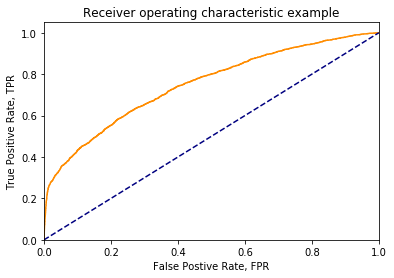

In [20]:

# TPR = TP/P
# FPR = FP/N
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, lr.predict_proba(X_test)[:,1],pos_label=1)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Postive Rate, FPR')
plt.ylabel('True Positive Rate, TPR')
plt.title('Receiver operating characteristic example')
plt.show()